In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preprocessing

1.1 Data Cleaning

In [150]:
columns=['Station Code','Location','State','Temp Min','Temp Max','Dissoved Oxygen Min','Dissoved Oxygen Max','pH Min','pH Max','Conductivity Min','Conductivity Max','BOD Min','BOD Max','Nitrate Min','Nitrate Max','Fecal Coliform Min','Fecal Coliform Max','Total Coliform Min','Total Coliform Max']

In [151]:
def fileInfo(file_path:str):

    # Create an ExcelFile object
    xls = pd.ExcelFile(file_path)

    # Get the sheet names
    sheet_names = xls.sheet_names

    # Get the number of sheets
    num_sheets = len(sheet_names)

    # Print the sheet names and the number of sheets
    print("Sheet Names:", sheet_names)
    print("Number of Sheets:", num_sheets) 

    return sheet_names

In [311]:
file_name='../data/water pollution/WQuality_River-Data-2021 (1).xlsx'
fileInfo(file_name)

Sheet Names: ['Table 1', 'Table 2', 'Table 3', 'Table 4', 'Table 5', 'Table 6', 'Table 7', 'Table 8', 'Table 9', 'Table 10', 'Table 11', 'Table 12', 'Table 13', 'Table 14', 'Table 15', 'Table 16', 'Table 17', 'Table 18', 'Table 19', 'Table 20', 'Table 21', 'Table 22', 'Table 23', 'Table 24', 'Table 25', 'Table 26', 'Table 27', 'Table 28', 'Table 29', 'Table 30', 'Table 31', 'Table 32', 'Table 33', 'Table 34', 'Table 35', 'Table 36']
Number of Sheets: 36


['Table 1',
 'Table 2',
 'Table 3',
 'Table 4',
 'Table 5',
 'Table 6',
 'Table 7',
 'Table 8',
 'Table 9',
 'Table 10',
 'Table 11',
 'Table 12',
 'Table 13',
 'Table 14',
 'Table 15',
 'Table 16',
 'Table 17',
 'Table 18',
 'Table 19',
 'Table 20',
 'Table 21',
 'Table 22',
 'Table 23',
 'Table 24',
 'Table 25',
 'Table 26',
 'Table 27',
 'Table 28',
 'Table 29',
 'Table 30',
 'Table 31',
 'Table 32',
 'Table 33',
 'Table 34',
 'Table 35',
 'Table 36']

In [312]:
def readExcel(file_path:str, sheet_name:str, header:int=0,skip=None,columns=None):
    df = pd.read_excel(file_path, sheet_name=sheet_name ,header=header,skiprows=skip,usecols=columns)
    return df



In [321]:
df = readExcel(file_name, 'Table 1',header=0,skip=3)
len(df),len(df.columns)

(16, 23)

In [322]:
df.head()

,"PRIMARY WATER QUALITY CRITERIA NOTIFIED UNDER E(P) RULES, 1986",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,> 5.0,Unnamed: 7,6.5-8.5,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,< 2500\nMPN/100ML,Unnamed: 17,Unnamed: 18,Unnamed: 19,< 500\nMPN/100ML,Unnamed: 21,Unnamed: 22
0,1001,RIVER BEAS AT U/S\nMANALI,NaN,HIMACHAL\nPRADESH,4,14.0,7.9,9.7,7.2,8.0,...,1,0.30,0.72,2,110,25,540,2,NaN,2
1,2601,RIVER BEAS AT D/S\nMANALI,NaN,HIMACHAL\nPRADESH,4,14.0,7.7,9.4,7.1,7.8,...,1,0.32,0.88,40,350,240,1600,2,NaN,2
2,4444,RIVER BEAS D/S OF\nWPF AT MANALI,NaN,HIMACHAL\nPRADESH,3,13.0,7.7,9.8,6.9,7.9,...,1,0.32,0.92,94,920,430,1600,2,NaN,2
3,4037,RIVER BEAS D/S\nMANALSU NALLAH,NaN,HIMACHAL\nPRADESH,4,13.0,7.8,9.9,6.9,7.9,...,1,0.32,0.82,33,140,170,430,2,NaN,2
4,3866,RIVER BEAS BEFORE CONFLUENCE TO\nMANALSU NALLAH,NaN,HIMACHAL PRADESH,4,12.0,7.9,9.8,7.1,8.4,...,1,0.32,0.62,26,94,120,350,2,NaN,2


In [ ]:
df=df.drop(columns=['Min.8','Max.8'])

In [293]:
nul=df.isna().sum().to_list()
cols=df.columns.to_list()

for i in range(len(nul)):
    if nul[i]==len(df):
        print(cols[i])
        df=df.drop(cols[i],axis=1)


In [285]:
df.columns = columns
df

,Station Code,Location,State,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Fecal Coliform Min,Fecal Coliform Max,Total Coliform Min,Total Coliform Max
0,1001,BEAS AT U/S MANALI,HIMACHAL PRADESH,2.0,13.0,8.7,11.2,7.3,8.4,90.0,179,0.1,0.2,0.20,0.31,12.0,33.0,120.0,240
1,4444,RIVER BEAS D/S OF WPF AT MANALI,HIMACHAL PRADESH,8.0,14.0,8.5,10.8,7.3,8.1,62.0,92,0.1,0.8,0.20,0.20,31.0,94.0,280.0,540
2,4037,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,2.0,13.0,8.9,10.9,7.0,8.3,68.0,135,0.1,1,0.10,0.10,20.0,32.0,120.0,280
3,2601,BEAS AT D/S MANALI,HIMACHAL PRADESH,3.0,14.0,8.2,11.1,6.9,8.2,78.0,218,0.1,0.6,0.10,0.40,25.0,170.0,280.0,920
4,2602,BEAS AT U/S KULLU,HIMACHAL PRADESH,5.0,15.0,7.6,11.5,7.0,8.6,63.0,149,0.1,0.4,0.10,0.20,25.0,70.0,220.0,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1022,"SUTLEJ AT BRIDGE HARIKE,\nAMRITSAR",PUNJAB,14.0,32.0,5.2,7,7.2,7.9,280.0,408,1.8,4.4,0.90,3.20,200.0,7000.0,3300.0,11000
77,1021,"SUTLEJ AT BOAT BDG. DHARMKOTNAKODAR ROAD,\nJAL...",PUNJAB,14.0,27.0,3,5.9,6.9,7.9,308.0,888,3.2,20,0.29,1.93,11000.0,93000.0,17000.0,260000
78,1381,"SUTLEJ AT D/S EAST BEIN, PUNJAB",PUNJAB,12.0,31.0,1,6,7.3,8.0,292.0,1230,3.4,22,1.00,2.50,200.0,22000.0,3300.0,54000
79,1691,"SUTLEJ AT U/S HUSSANIWALA\n- H/W FEROZEPUR, PU...",PUNJAB,10.0,34.0,6.6,9,7.0,8.3,202.0,296,1.1,1.2,0.20,1.40,93.0,930.0,490.0,2400


In [323]:
def MakeCsvFile(fileName):
    test_main=pd.DataFrame()
    failed=[]
    sheets=fileInfo(fileName)
    for sheet in sheets:
        df = readExcel(fileName, sheet,header=0,skip=3)
        try:
            # drop last two columns
            df=df.drop(columns=df.columns[-2:])
            df.columns = columns
            test_main = test_main.append(df,ignore_index=True)
        except Exception as e:
            print(sheet)
            failed.append(sheet)
            print(e)
    print(failed)
    return test_main
        
    # df = readExcel('../data/water pollution/NWMP_DATA_2015.xlsx', 'Table 6',header=0,skip=3,)

In [ ]:
res=MakeCsvFile(file_name)

In [209]:
# res=res.append(df,ignore_index=True)

/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_11682/3116501516.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=res.append(df,ignore_index=True)


In [325]:
res.to_csv('../data/water pollution/csv/water_pollution_2021.csv',index=False)

In [260]:
# a.to_csv('../data/water pollution/csv/water_pollution_2018.csv',index=False)

## lets join all the csv together

In [326]:
df_2015=pd.read_csv('../data/water pollution/csv/water_pollution_2015.csv')
df_2016=pd.read_csv('../data/water pollution/csv/water_pollution_2016.csv')
df_2017=pd.read_csv('../data/water pollution/csv/water_pollution_2017.csv')
df_2018=pd.read_csv('../data/water pollution/csv/water_pollution_2018.csv')
df_2019=pd.read_csv('../data/water pollution/csv/water_pollution_2019.csv')
df_2020=pd.read_csv('../data/water pollution/csv/water_pollution_2020.csv')
df_2021=pd.read_csv('../data/water pollution/csv/water_pollution_2021.csv')

In [327]:
combined_df=pd.DataFrame()

In [328]:
combined_df=combined_df.append(df_2015,ignore_index=True)
combined_df=combined_df.append(df_2016,ignore_index=True)
combined_df=combined_df.append(df_2017,ignore_index=True)
combined_df=combined_df.append(df_2018,ignore_index=True)
combined_df=combined_df.append(df_2019,ignore_index=True)
combined_df=combined_df.append(df_2020,ignore_index=True)
combined_df=combined_df.append(df_2021,ignore_index=True)

/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_11682/2893741430.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df=combined_df.append(df_2015,ignore_index=True)
/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_11682/2893741430.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df=combined_df.append(df_2016,ignore_index=True)
/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_11682/2893741430.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df=combined_df.append(df_2017,ignore_index=True)
/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_11682/2893741430.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [330]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Station Code         7279 non-null   object
 1   Location             7282 non-null   object
 2   State                7259 non-null   object
 3   Temp Min             7203 non-null   object
 4   Temp Max             7202 non-null   object
 5   Dissoved Oxygen Min  7239 non-null   object
 6   Dissoved Oxygen Max  7227 non-null   object
 7   pH Min               7298 non-null   object
 8   pH Max               7284 non-null   object
 9   Conductivity Min     7127 non-null   object
 10  Conductivity Max     7126 non-null   object
 11  BOD Min              7241 non-null   object
 12  BOD Max              7227 non-null   object
 13  Nitrate Min          6944 non-null   object
 14  Nitrate Max          6947 non-null   object
 15  Fecal Coliform Min   6642 non-null   object
 16  Fecal 

In [331]:
combined_df.to_csv('../data/water pollution/csv/water_pollution_combined.csv',index=False)

In [332]:
combined_df.shape

(7323, 19)

1.2 Data Processing

In [70]:
df=pd.read_csv('../data/water pollution/csv/water_pollution_combined.csv')

In [3]:
df.head()

,Station Code,Location,State,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Fecal Coliform Min,Fecal Coliform Max,Total Coliform Min,Total Coliform Max
0,1088,"RAVI AT U/S MADHOPUR, H.P.",HIMACHAL PRADESH,11.5,20.0,7.8,9.2,6.3,8.3,149.0,413.0,0.2,4.0,0.1,0.9,NaN,NaN,NaN,NaN
1,1089,"RAVI AT U/S CHAMBA, H.P.",HIMACHAL PRADESH,7.9,14.8,8.6,8.8,6.8,8.4,92.0,244.0,0.2,0.7,0.1,0.9,8.0,8.0,9.0,60.0
2,2614,RAVI AT CHAMERA RESERVOIR,HIMACHAL PRADESH,9.5,21.0,8.4,8.9,7.1,8.4,113.0,222.0,0.2,0.8,0.1,3.1,11.0,11.0,17.0,110.0
3,2615,RAVI AT D/S CHAMERA III HEP,HIMACHAL PRADESH,7.8,15.0,8.5,8.9,6.4,8.9,119.0,399.0,0.2,0.8,0.1,1.1,9.0,9.0,11.0,110.0
4,2613,RAVI AT D/S OF CHAMBA TOWN,HIMACHAL PRADESH,7.8,15.0,8.5,8.8,6.8,8.5,96.0,237.0,0.2,1.6,0.0,1.1,11.0,11.0,11.0,80.0


In [4]:
df.isna().sum()

Station Code            44
Location                41
State                   64
Temp Min               120
Temp Max               121
Dissoved Oxygen Min     84
Dissoved Oxygen Max     96
pH Min                  25
pH Max                  39
Conductivity Min       196
Conductivity Max       197
BOD Min                 82
BOD Max                 96
Nitrate Min            379
Nitrate Max            376
Fecal Coliform Min     681
Fecal Coliform Max     695
Total Coliform Min     498
Total Coliform Max     506
dtype: int64

In [5]:
numerical_col=df.columns.to_list()[3:]
numerical_col

['Temp Min',
 'Temp Max',
 'Dissoved Oxygen Min',
 'Dissoved Oxygen Max',
 'pH Min',
 'pH Max',
 'Conductivity Min',
 'Conductivity Max',
 'BOD Min',
 'BOD Max',
 'Nitrate Min',
 'Nitrate Max',
 'Fecal Coliform Min',
 'Fecal Coliform Max',
 'Total Coliform Min',
 'Total Coliform Max']

In [71]:

from curses.ascii import isdigit
import re

def convert_column_to_numeric(df, column_name):
    """Converts a column to numeric values.

    Args:
        df (pd df): data frame
        column_name (string): column name

    Returns:
        None
    """
    # if number is null , or not a number, then return the same value
    # else convert to float
    isDigit=re.compile(r'^\d+(?:\.\d+)?$')

    
    df[column_name] = df[column_name].apply(lambda val: float(eval(val)) if (pd.notna(val) and isDigit.match(val) ) else None)

In [72]:
df[numerical_col].apply(lambda x: convert_column_to_numeric(df, x.name))

Temp Min               None
Temp Max               None
Dissoved Oxygen Min    None
Dissoved Oxygen Max    None
pH Min                 None
pH Max                 None
Conductivity Min       None
Conductivity Max       None
BOD Min                None
BOD Max                None
Nitrate Min            None
Nitrate Max            None
Fecal Coliform Min     None
Fecal Coliform Max     None
Total Coliform Min     None
Total Coliform Max     None
dtype: object

In [40]:
# df=pd.read_csv('../data/water pollution/csv/water_pollution_combined_cleaned.csv')

In [73]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df[numerical_col] = imputer.fit_transform(df[numerical_col])



In [52]:
df

,Station Code,Location,State,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Fecal Coliform Min,Fecal Coliform Max,Total Coliform Min,Total Coliform Max
0,1088,"RAVI AT U/S MADHOPUR, H.P.",HIMACHAL PRADESH,11.5,20.0,7.8,9.2,6.3,8.3,149.0,413.0,0.2,4.0,0.10,0.90,2.0,2.0,2.0,1600.0
1,1089,"RAVI AT U/S CHAMBA, H.P.",HIMACHAL PRADESH,7.9,14.8,8.6,8.8,6.8,8.4,92.0,244.0,0.2,0.7,0.10,0.90,8.0,8.0,9.0,60.0
2,2614,RAVI AT CHAMERA RESERVOIR,HIMACHAL PRADESH,9.5,21.0,8.4,8.9,7.1,8.4,113.0,222.0,0.2,0.8,0.10,3.10,11.0,11.0,17.0,110.0
3,2615,RAVI AT D/S CHAMERA III HEP,HIMACHAL PRADESH,7.8,15.0,8.5,8.9,6.4,8.9,119.0,399.0,0.2,0.8,0.10,1.10,9.0,9.0,11.0,110.0
4,2613,RAVI AT D/S OF CHAMBA TOWN,HIMACHAL PRADESH,7.8,15.0,8.5,8.8,6.8,8.5,96.0,237.0,0.2,1.6,0.00,1.10,11.0,11.0,11.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7318,30068.0,RIVER SUBARNAREKHA AT GOPIBALLAVPUR (WEST\nBEN...,WEST BENGAL,23.0,31.0,7.6,12.0,8.1,8.5,192.0,319.0,1.0,1.5,0.32,0.32,490.0,1100.0,3300.0,79000.0
7319,30069.0,RIVER SUBARNAREKHA AT\nLAKHANNATH (ORISSA),ODISHA,22.0,31.0,7.3,11.0,7.6,8.5,173.0,308.0,1.0,2.2,0.32,0.44,230.0,1300.0,4900.0,33000.0
7320,30090.0,RIVER SUBARNAREKHA AT JHARKHAND - WEST BENGAL ...,WEST BENGAL,24.0,32.0,7.5,8.9,8.2,8.2,193.0,299.0,1.1,1.3,0.32,0.32,330.0,330.0,920000.0,920000.0
7321,4086.0,"RIVER SUBARNREKHA U/S HINDALCO IND LTD, MURLI ...",JHARKHAND,12.0,26.0,7.0,8.4,6.8,7.4,210.0,380.0,2.1,3.0,0.30,0.00,2.0,2.0,2.0,1600.0


In [11]:
df.isna().sum()

Station Code           44
Location               41
State                  64
Temp Min                0
Temp Max                0
Dissoved Oxygen Min     0
Dissoved Oxygen Max     0
pH Min                  0
pH Max                  0
Conductivity Min        0
Conductivity Max        0
BOD Min                 0
BOD Max                 0
Nitrate Min             0
Nitrate Max             0
Fecal Coliform Min      0
Fecal Coliform Max      0
Total Coliform Min      0
Total Coliform Max      0
dtype: int64

In [56]:
df.head()

,Station Code,Location,State,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Fecal Coliform Min,Fecal Coliform Max,Total Coliform Min,Total Coliform Max
0,1088,"RAVI AT U/S MADHOPUR, H.P.",HIMACHAL PRADESH,11.5,20.0,7.8,9.2,6.3,8.3,149.0,413.0,0.2,4.0,0.1,0.9,2.0,2.0,2.0,1600.0
1,1089,"RAVI AT U/S CHAMBA, H.P.",HIMACHAL PRADESH,7.9,14.8,8.6,8.8,6.8,8.4,92.0,244.0,0.2,0.7,0.1,0.9,8.0,8.0,9.0,60.0
2,2614,RAVI AT CHAMERA RESERVOIR,HIMACHAL PRADESH,9.5,21.0,8.4,8.9,7.1,8.4,113.0,222.0,0.2,0.8,0.1,3.1,11.0,11.0,17.0,110.0
3,2615,RAVI AT D/S CHAMERA III HEP,HIMACHAL PRADESH,7.8,15.0,8.5,8.9,6.4,8.9,119.0,399.0,0.2,0.8,0.1,1.1,9.0,9.0,11.0,110.0
4,2613,RAVI AT D/S OF CHAMBA TOWN,HIMACHAL PRADESH,7.8,15.0,8.5,8.8,6.8,8.5,96.0,237.0,0.2,1.6,0.0,1.1,11.0,11.0,11.0,80.0


In [54]:
# df.to_csv('../data/water pollution/csv/water_pollution_combined_cleaned.csv',index=False)

## 2.Data  Visualization

In [23]:
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Distribution of Temp Min')

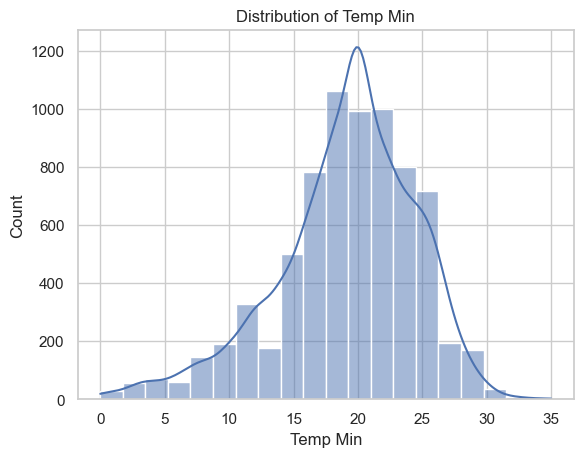

In [53]:
sns.histplot(df['Temp Min'] ,kde=True ,bins=20)

plt.title("Distribution of Temp Min")

Text(0.5, 1.0, 'Distribution of Temp Max')

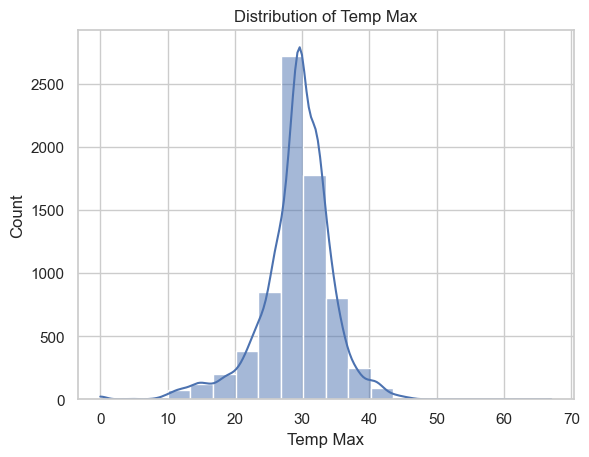

In [26]:
sns.histplot(df['Temp Max'] ,kde=True ,bins=20)
plt.title("Distribution of Temp Max")

<Axes: xlabel='Dissoved Oxygen Min', ylabel='Count'>

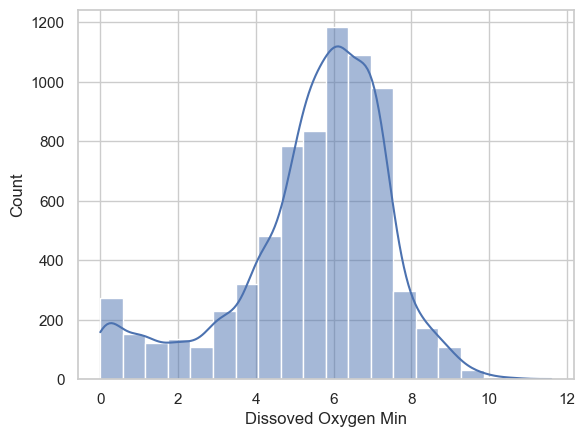

In [27]:
sns.histplot(df['Dissoved Oxygen Min'] ,kde=True ,bins=20)

<Axes: xlabel='Nitrate Max', ylabel='Count'>

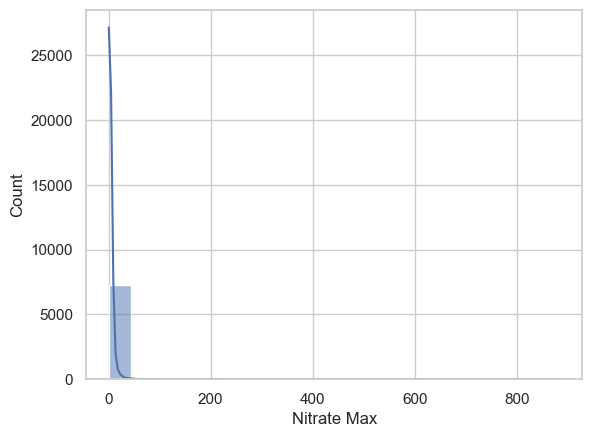

In [55]:
sns.histplot(df['Nitrate Max'],kde=True ,bins=20)

In [57]:
df.describe()

,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Fecal Coliform Min,Fecal Coliform Max,Total Coliform Min,Total Coliform Max
count,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7.323000e+03,7.323000e+03,7.323000e+03,7.323000e+03
mean,19.082439,29.276758,5.487269,8.010029,7.188985,8.397677,384.076471,1786.244517,2.445240,8.671280,0.423825,3.559536,2.962041e+03,3.637671e+05,7.189761e+03,9.911644e+05
std,5.403030,5.266785,1.976324,2.603259,0.525316,13.276583,1964.335283,8934.193536,5.594753,37.585979,1.067838,23.148320,4.628446e+04,9.486931e+06,1.253168e+05,3.452008e+07
min,0.000000,0.000000,0.000000,0.000000,0.800000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,16.000000,27.000000,4.700000,7.100000,7.000000,7.900000,131.000000,310.000000,1.000000,2.000000,0.100000,0.400000,2.000000e+00,7.000000e+00,2.300000e+01,3.500000e+02
50%,20.000000,30.000000,6.000000,7.900000,7.200000,8.200000,210.000000,465.000000,1.300000,2.800000,0.300000,1.098000,2.000000e+01,2.500000e+02,1.700000e+02,1.600000e+03
75%,23.000000,32.000000,6.800000,8.900000,7.500000,8.500000,306.000000,850.000000,2.300000,5.600000,0.320000,2.600000,3.000000e+02,2.400000e+03,9.400000e+02,7.000000e+03
max,35.000000,67.000000,11.600000,81.000000,9.000000,811.000000,54400.000000,513000.000000,147.000000,1820.000000,22.400000,884.000000,3.300000e+06,5.400000e+08,9.400000e+06,2.400000e+09


### lets transForm the data (standardize it)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
train_df=df.copy()

# apply standardization on numerical features
train_df[numerical_col] = scaler.fit_transform(train_df[numerical_col])
train_df.head()

,Station Code,Location,State,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Fecal Coliform Min,Fecal Coliform Max,Total Coliform Min,Total Coliform Max
0,1088,"RAVI AT U/S MADHOPUR, H.P.",HIMACHAL PRADESH,-1.403464,-1.761491,1.170298,0.457140,-1.692404,-0.007358,-0.119680,-0.153717,-0.401339,-0.124291,-0.303274,-0.114899,-0.063958,-0.038346,-0.057361,-0.028668
1,1089,"RAVI AT U/S CHAMBA, H.P.",HIMACHAL PRADESH,-2.069802,-2.748878,1.575118,0.303476,-0.740530,0.000175,-0.148700,-0.172634,-0.401339,-0.212096,-0.303274,-0.114899,-0.063828,-0.038346,-0.057305,-0.028713
2,2614,RAVI AT CHAMERA RESERVOIR,HIMACHAL PRADESH,-1.773652,-1.571608,1.473913,0.341892,-0.169406,0.000175,-0.138009,-0.175097,-0.401339,-0.209435,-0.303274,-0.019853,-0.063763,-0.038345,-0.057241,-0.028711
3,2615,RAVI AT D/S CHAMERA III HEP,HIMACHAL PRADESH,-2.088311,-2.710901,1.524515,0.341892,-1.502029,0.037838,-0.134954,-0.155284,-0.401339,-0.209435,-0.303274,-0.106258,-0.063806,-0.038346,-0.057289,-0.028711
4,2613,RAVI AT D/S OF CHAMBA TOWN,HIMACHAL PRADESH,-2.088311,-2.710901,1.524515,0.303476,-0.740530,0.007708,-0.146663,-0.173418,-0.401339,-0.188149,-0.396927,-0.106258,-0.063763,-0.038345,-0.057289,-0.028712


## 4. Lets do clustering

In [121]:
# fuction to workout optimun number of clusters
from sklearn.cluster import KMeans
import plotly.express as px

def optimun_k_means(data,max_k):
    mean_distance=[]
    intertias=[]

    for k in range(1,max_k+1):
        kmeans=KMeans(n_clusters=k,random_state=0,verbose=0)
        kmeans.fit(data)
        mean_distance.append(k)
        intertias.append(kmeans.inertia_)

    fig=px.line(x=mean_distance,y=intertias ,)

    # sns.lineplot(x=mean_distance,y=intertias)

    fig.update_layout(
        title='Elbow method',
        xaxis_title='Number of clusters',
        yaxis_title='Mean distance'
    
    )

    fig.show()
    
    

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans

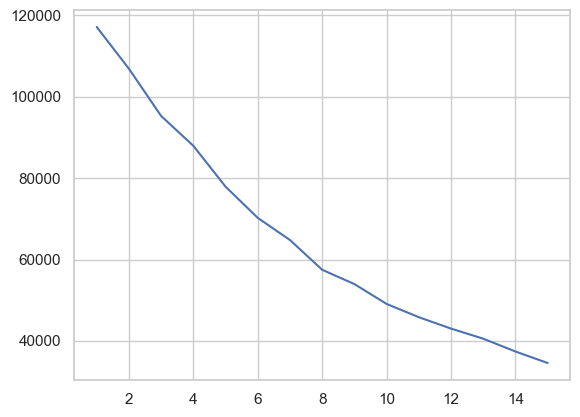

In [123]:

optimun_k_means(train_df[numerical_col],15)

In [69]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']) 
numerical_columns[:5]

,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Fecal Coliform Min,Fecal Coliform Max,Total Coliform Min,Total Coliform Max
0,-1.398502,-1.757469,1.177707,0.455506,-1.697329,-0.007356,-0.124517,-0.162346,-0.421259,-0.128471,-0.331657,-0.136343,9.829456e-18,0.000000,0.000000,0.000000
1,-2.065159,-2.745167,1.582865,0.301831,-0.744809,0.000177,-0.153543,-0.181276,-0.421259,-0.216304,-0.331657,-0.136343,-7.572256e-02,-0.045466,-0.065809,-0.032952
2,-1.768867,-1.567528,1.481575,0.340250,-0.173296,0.000177,-0.142849,-0.183740,-0.421259,-0.213643,-0.331657,-0.041141,-7.565771e-02,-0.045466,-0.065745,-0.032951
3,-2.083677,-2.707178,1.532220,0.340250,-1.506825,0.037840,-0.139794,-0.163914,-0.421259,-0.213643,-0.331657,-0.127688,-7.570095e-02,-0.045466,-0.065793,-0.032951
4,-2.083677,-2.707178,1.532220,0.301831,-0.744809,0.007709,-0.151506,-0.182060,-0.421259,-0.192350,-0.425463,-0.127688,-7.565771e-02,-0.045466,-0.065793,-0.032952


In [124]:

# Select the numerical columns for clustering
numerical_columns = train_df.select_dtypes(include=['float64', 'int64'])
# numerical_columns = numerical_columns.drop(columns=['Station Code','Temp Min','Temp Max','Dissoved Oxygen Min','Dissoved Oxygen Max','pH Min','pH Max','Conductivity Min','Conductivity Max','BOD Min','BOD Max','Nitrate Min','Nitrate Max','Fecal Coliform Min','Fecal Coliform Max','Total Coliform Min','Total Coliform Max'])

# Choose the number of clusters (you can adjust this based on your data)
n_clusters = 12

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the data to the `kmeans` object
train_df['cluster'] = kmeans.fit_predict(numerical_columns)

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



#### Plotting the clusters

In [125]:
# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a dataframe from the centroids

centroids_df = pd.DataFrame(centroids, columns=numerical_columns.columns)

centroids_df


,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Fecal Coliform Min,Fecal Coliform Max,Total Coliform Min,Total Coliform Max
0,-1.649967,-1.679222,0.865393,0.430849,0.073084,-0.020023,-0.104087,-0.123333,-0.262251,-0.165916,-0.073548,-0.093799,-0.061632,-0.036885,-0.054999,-0.027984
1,0.241752,0.295622,0.325375,0.102464,0.566575,-0.008149,-0.057913,-0.090733,-0.131403,-0.123836,-0.046621,-0.059049,-0.041563,-0.034044,-0.036744,-0.026472
2,-1.310917,-0.242434,0.816081,-0.080685,1.353592,60.456605,0.024398,-0.133233,0.117039,-0.028504,-0.115967,-0.119219,-0.056871,-0.037820,-0.051790,-0.028483
3,1.002758,-0.432316,-2.700788,-1.252373,-0.169406,-0.037488,0.470127,0.130044,0.742668,2.416724,-0.162793,0.373291,2.348421,54.250564,1.706274,57.912531
4,1.103017,0.532918,-0.533317,-0.704945,0.449312,-0.012379,15.895609,8.096089,0.452197,0.012848,0.322645,0.253079,-0.062519,-0.038284,-0.055697,-0.028678
5,0.169835,0.137331,0.259454,-0.080685,-0.169406,-0.097748,0.229062,-0.084876,12.790493,1.924485,-0.115967,-0.114899,71.239093,0.699561,74.957641,0.243609
6,0.298307,0.301168,-1.858510,-0.809954,-0.170183,-0.019077,0.084127,0.329179,0.568083,0.457338,0.162032,0.131796,0.115501,0.065136,0.099162,0.028116
7,0.313797,0.179527,-1.461029,-0.627046,-0.169406,-0.014890,0.150828,-0.046805,0.297776,0.676299,0.054691,24.764728,0.015937,-0.034416,0.027568,-0.025959
8,0.211232,0.148360,-0.030851,-0.013087,-0.924281,-0.027094,-0.097668,-0.044841,-0.171582,-0.117887,-0.119144,-0.050852,-0.046480,-0.031018,-0.041811,-0.022134
9,0.502163,0.191274,-1.513931,-1.639153,-0.403047,-0.040912,0.454205,0.285529,8.345684,7.813870,0.483417,0.188602,2.224466,0.977221,1.788323,0.423921


In [128]:
train_df['cluster'].value_counts()

1     3381
8     1963
0      941
6      931
9       44
4       24
10      18
7        9
11       7
2        2
3        2
5        1
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Distribution of clusters')

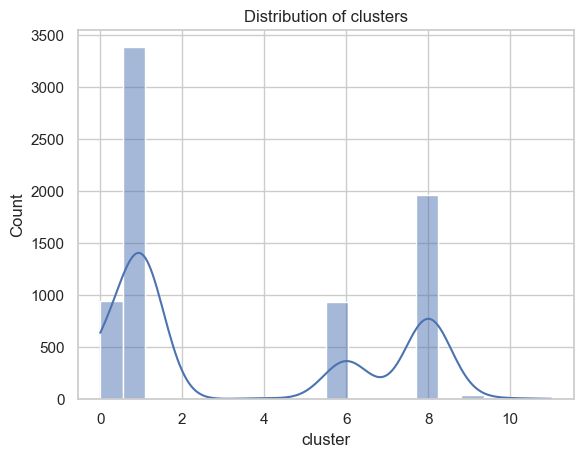

In [126]:
sns.set_theme(style="whitegrid")

sns.histplot(train_df['cluster'] ,kde=True ,bins=20)

plt.title("Distribution of clusters")


In [127]:
import plotly.express as px

fig = px.scatter_3d(train_df, x='Temp Min', y='Temp Max', z='Dissoved Oxygen Min',
                color='cluster' ,opacity=0.5 )
fig.show()


In [ ]:
px.scatter(train_df, x='Temp Min', y='Temp Max', color='cluster', opacity=0.5)

## Clustering with selected attributes

In [93]:
numerical_columns[:3]

,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,Conductivity Max,BOD Min,BOD Max,Nitrate Min,Nitrate Max,Fecal Coliform Min,Fecal Coliform Max,Total Coliform Min,Total Coliform Max
0,-1.403464,-1.761491,1.170298,0.457140,-1.692404,-0.007358,-0.119680,-0.153717,-0.401339,-0.124291,-0.303274,-0.114899,-0.063958,-0.038346,-0.057361,-0.028668
1,-2.069802,-2.748878,1.575118,0.303476,-0.740530,0.000175,-0.148700,-0.172634,-0.401339,-0.212096,-0.303274,-0.114899,-0.063828,-0.038346,-0.057305,-0.028713
2,-1.773652,-1.571608,1.473913,0.341892,-0.169406,0.000175,-0.138009,-0.175097,-0.401339,-0.209435,-0.303274,-0.019853,-0.063763,-0.038345,-0.057241,-0.028711


In [160]:
selected=numerical_col[:3] # select the columns for clustering

for k in range(10,15):
    kmeans=KMeans(n_clusters=k,random_state=0,verbose=0)

    kmeans.fit(train_df[selected])

    train_df[f'cluster-{k}']=kmeans.fit_predict(train_df[selected])


/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/magesh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans

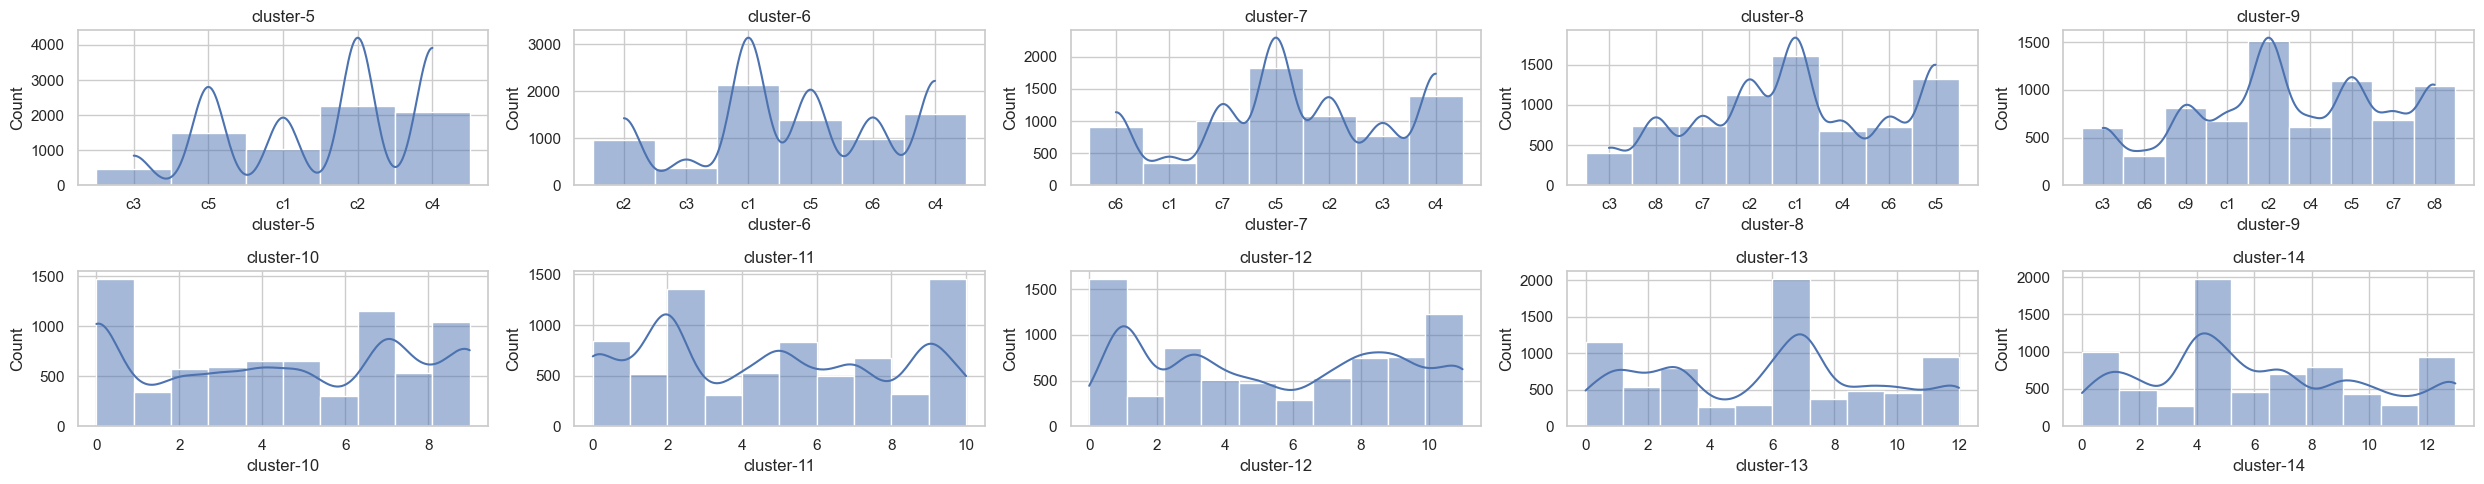

In [133]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(25,5))

for i ,ax in enumerate(fig.axes,start=0):

    sns.histplot(train_df[f'cluster-{i+5}'],ax=ax,kde=True,bins=10)
    ax.set_title(f'cluster-{i+5}')

plt.tight_layout()


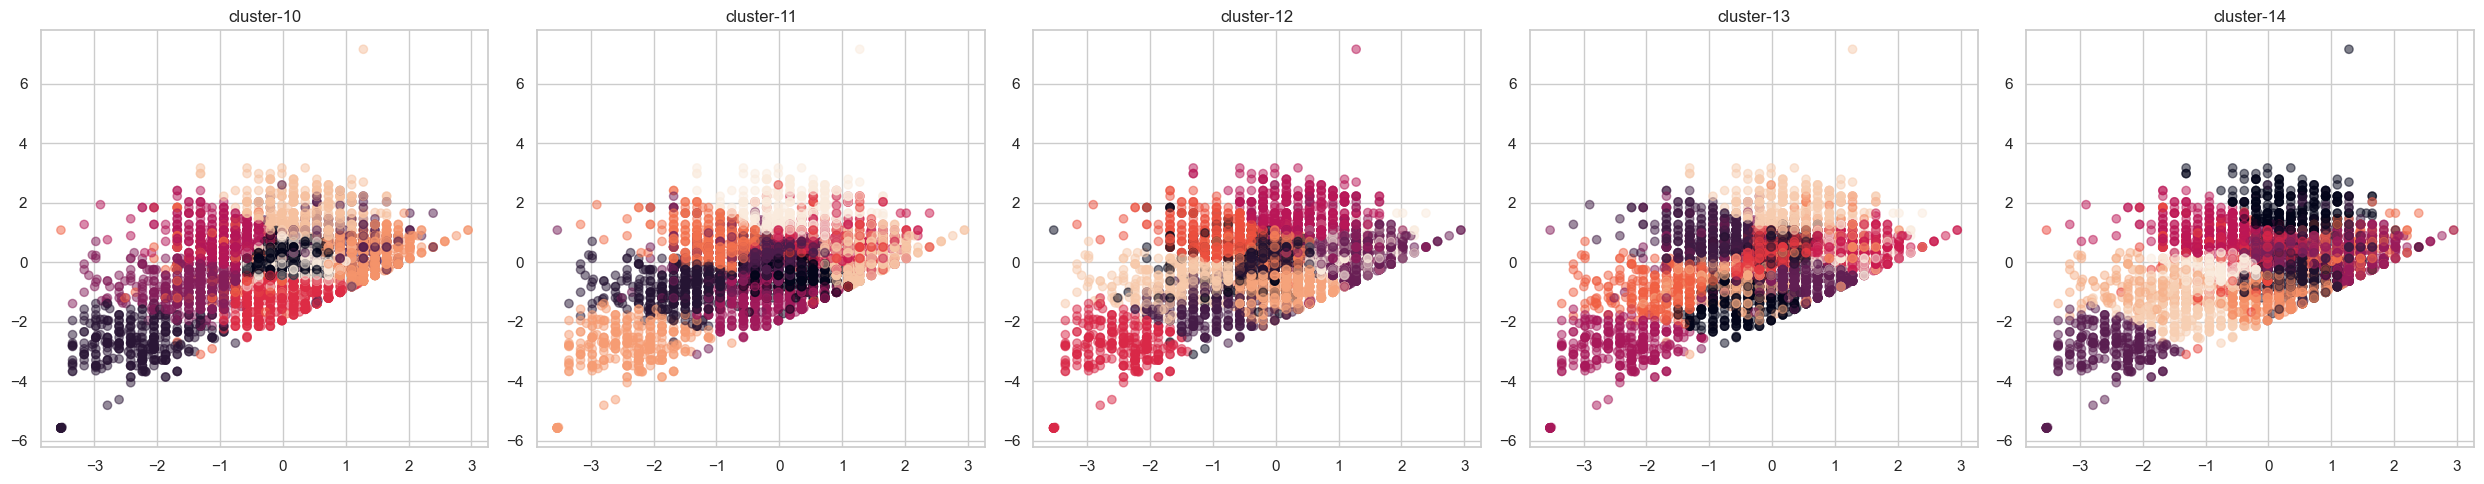

In [161]:
fig,ax=plt.subplots(ncols=5,nrows=1,figsize=(25,5))

for i ,ax in enumerate(fig.axes,start=0):
    ax.scatter(train_df['Temp Min'],train_df['Temp Max'],c=train_df[f'cluster-{i+10}'],alpha=0.5)
    ax.set_title(f'cluster-{i+10}')

plt.tight_layout()


In [109]:
px.scatter(train_df, x='Temp Min', y='Temp Max', color='cluster-8', opacity=0.5)

In [154]:
train_df['cluster-14'] = train_df['cluster-14'].replace(replace_dict)

In [155]:
train_df['cluster-14'].value_counts()

c5     1163
c6      815
c8      701
c2      642
c14     615
c10     537
c3      485
c7      458
c11     428
c1      358
c13     316
c12     281
c4      265
c9      259
Name: cluster-14, dtype: int64

In [156]:
replace_dict={
    0:'c1',
    1:'c2',
    2:'c3',
    3:'c4',
    4:'c5',
    5:'c6',
    6:'c7',
    7:'c8',
    8:'c9',
    9:'c10',
    10:'c11',
    11:'c12',
    12:'c13',
    13:'c14',
    14:'c15',
    15:'c16',
    16:'c17',
}

In [157]:
# replace the cluster number with cluster name
for  i in range(10,15):
    train_df[f'cluster-{i}']=train_df[f'cluster-{i}'].replace(replace_dict)
    

In [158]:
train_df['cluster'] = train_df['cluster'].replace(replace_dict)

In [119]:
train_df['cluster'].value_counts()

c1     4860
c2     1311
c3     1035
c8       70
c9       24
c10       9
c7        9
c4        2
c6        2
c5        1
Name: cluster, dtype: int64

In [148]:
import datetime
def export_csv(df,fileName,path):
    now = datetime.datetime.now()
    fileName=fileName+now.strftime("%Y-%m-%d-%H-%M-%S")+'.csv'
    df.to_csv(path+fileName,index=False)

In [159]:

export_csv(train_df,'water_pollution_clustered','../data/results/')

In [149]:
train_df

,Station Code,Location,State,Temp Min,Temp Max,Dissoved Oxygen Min,Dissoved Oxygen Max,pH Min,pH Max,Conductivity Min,...,cluster-5,cluster-6,cluster-7,cluster-8,cluster-9,cluster-10,cluster-11,cluster-12,cluster-13,cluster-14
0,1088,"RAVI AT U/S MADHOPUR, H.P.",HIMACHAL PRADESH,-1.403464,-1.761491,1.170298,0.457140,-1.692404,-0.007358,-0.119680,...,c3,c2,c6,c3,c3,c4,c2,c3,c1,12
1,1089,"RAVI AT U/S CHAMBA, H.P.",HIMACHAL PRADESH,-2.069802,-2.748878,1.575118,0.303476,-0.740530,0.000175,-0.148700,...,c3,c3,c1,c3,c6,c2,c9,c7,c6,c4
2,2614,RAVI AT CHAMERA RESERVOIR,HIMACHAL PRADESH,-1.773652,-1.571608,1.473913,0.341892,-0.169406,0.000175,-0.138009,...,c3,c3,c6,c3,c3,c4,c2,c3,c9,12
3,2615,RAVI AT D/S CHAMERA III HEP,HIMACHAL PRADESH,-2.088311,-2.710901,1.524515,0.341892,-1.502029,0.037838,-0.134954,...,c3,c3,c1,c3,c6,c2,c9,c7,c6,c4
4,2613,RAVI AT D/S OF CHAMBA TOWN,HIMACHAL PRADESH,-2.088311,-2.710901,1.524515,0.303476,-0.740530,0.007708,-0.146663,...,c3,c3,c1,c3,c6,c2,c9,c7,c6,c4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7318,30068.0,RIVER SUBARNAREKHA AT GOPIBALLAVPUR (WEST\nBEN...,WEST BENGAL,0.725117,0.327213,1.069093,1.532788,1.734342,0.007708,-0.097789,...,c4,c1,c5,c1,c8,c1,c3,c4,c7,c5
7319,30069.0,RIVER SUBARNAREKHA AT\nLAKHANNATH (ORISSA),ODISHA,0.540023,0.327213,0.917286,1.148628,0.782468,0.007708,-0.107462,...,c4,c1,c5,c1,c2,c1,c3,c2,c8,c5
7320,30090.0,RIVER SUBARNAREKHA AT JHARKHAND - WEST BENGAL ...,WEST BENGAL,0.910211,0.517095,1.018491,0.341892,1.924716,-0.014890,-0.097279,...,c4,c4,c5,c5,c8,c8,c10,c4,c7,c6
7321,4086.0,"RIVER SUBARNREKHA U/S HINDALCO IND LTD, MURLI ...",JHARKHAND,-1.310917,-0.622198,0.765479,0.149811,-0.740530,-0.075151,-0.088625,...,c5,c2,c6,c7,c3,c4,c2,10,c9,13
